In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Copy-of-Student-Employability-Datasets.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head()

Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  \
0       Student 1                   4                   5                   4   
1       Student 2                   4                   4                   4   
2       Student 3                   4                   3                   3   
3       Student 4                   3                   3                   3   
4       Student 5                   4                   4                   3   

   MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
0                 5                5                         5   
1                 4                4                         4   
2                 3                3                         3   
3                 2                3                         3   
4                 3                4                         4   

   COMMUNICATION SKILLS     certifications          workshops  \
0                     5  shell programming    cloud computing   
1                     3   machine learning  database security   
2                     2    app development   web technologies   
3                     3             python       data science   
4                     3    app development    cloud computing   

   Student Performance Rating           CLASS              Suggested Job Role  
0                           5      Employable              Database Developer  
1                           5      Employable            Portal Administrator  
2                           5  LessEmployable            Portal Administrator  
3                           5  LessEmployable  Systems Security Administrator  
4                           5      Employable        Business Systems Analyst

In [5]:
data.tail()

Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  \
2977    Student 2996                   4                   3   
2978    Student 2997                   3                   4   
2979    Student 2998                   4                   5   
2980    Student 2999                   4                   4   
2981    Student 3000                   4                   4   

      PHYSICAL CONDITION  MENTAL ALERTNESS  SELF-CONFIDENCE  \
2977                   3                 3                3   
2978                   4                 4                4   
2979                   4                 5                4   
2980                   4                 3                4   
2981                   4                 4                3   

      ABILITY TO PRESENT IDEAS  COMMUNICATION SKILLS        certifications  \
2977                         3                     2         distro making   
2978                         4                     4         r programming   
2979                         4                     4       app development   
2980                         4                     3         distro making   
2981                         4                     4  information security   

              workshops  Student Performance Rating           CLASS  \
2977   system designing                           5      Employable   
2978   system designing                           5      Employable   
2979  database security                           5      Employable   
2980       data science                           5  LessEmployable   
2981       data science                           5      Employable   

                             Suggested Job Role  
2977             Information Technology Auditor  
2978                            Project Manager  
2979                          Technical Support  
2980  Software Quality Assurance (QA) / Testing  
2981                          Technical Support

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   certifications              2982 non-null   object
 9   workshops                   2982 non-null   object
 10  Student Performance Rating  2982 non-null   int64 
 11  CLASS                       2982 non-null   object
 12  Suggested Job Role          2982 non-null   object
dtypes: int64(8), object(5)
memory usage: 303.0+ KB


In [7]:
data.describe()

GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  \
count         2982.000000         2982.000000         2982.000000   
mean             4.246814            3.884641            3.972166   
std              0.678501            0.757013            0.744135   
min              2.000000            2.000000            2.000000   
25%              4.000000            3.000000            3.000000   
50%              4.000000            4.000000            4.000000   
75%              5.000000            4.000000            5.000000   
max              5.000000            5.000000            5.000000   

       MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
count       2982.000000      2982.000000               2982.000000   
mean           3.962777         3.910798                  3.813883   
std            0.781982         0.807602                  0.739390   
min            2.000000         2.000000                  2.000000   
25%            3.000000         3.000000                  3.000000   
50%            4.000000         4.000000                  4.000000   
75%            5.000000         5.000000                  4.000000   
max            5.000000         5.000000                  5.000000   

       COMMUNICATION SKILLS  Student Performance Rating  
count           2982.000000                 2982.000000  
mean               3.525486                    4.610664  
std                0.743881                    0.692845  
min                2.000000                    3.000000  
25%                3.000000                    4.000000  
50%                3.000000                    5.000000  
75%                4.000000                    5.000000  
max                5.000000                    5.000000

In [8]:
data.shape

(2982, 13)

In [9]:
data.columns

Index(['Name of Student', 'GENERAL APPEARANCE', 'MANNER OF SPEAKING',
       'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE',
       'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'certifications',
       'workshops', 'Student Performance Rating', 'CLASS',
       'Suggested Job Role'],
      dtype='object')

In [10]:
data['workshops'].unique()

array(['cloud computing', 'database security', 'web technologies',
       'data science', 'testing', 'hacking', 'game development',
       'system designing'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [12]:
data['workshops_encode']=Label_Encoder.fit_transform(data['workshops'])

In [13]:
data.head()

Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  \
0       Student 1                   4                   5                   4   
1       Student 2                   4                   4                   4   
2       Student 3                   4                   3                   3   
3       Student 4                   3                   3                   3   
4       Student 5                   4                   4                   3   

   MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
0                 5                5                         5   
1                 4                4                         4   
2                 3                3                         3   
3                 2                3                         3   
4                 3                4                         4   

   COMMUNICATION SKILLS     certifications          workshops  \
0                     5  shell programming    cloud computing   
1                     3   machine learning  database security   
2                     2    app development   web technologies   
3                     3             python       data science   
4                     3    app development    cloud computing   

   Student Performance Rating           CLASS              Suggested Job Role  \
0                           5      Employable              Database Developer   
1                           5      Employable            Portal Administrator   
2                           5  LessEmployable            Portal Administrator   
3                           5  LessEmployable  Systems Security Administrator   
4                           5      Employable        Business Systems Analyst   

   workshops_encode  
0                 0  
1                 2  
2                 7  
3                 1  
4                 0

In [14]:
data['certifications'].unique()

array(['shell programming', 'machine learning', 'app development',
       'python', 'r programming', 'information security', 'hadoop',
       'distro making', 'full stack'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
data['certifications_encode']=Label_Encoder.fit_transform(data['certifications'])

In [16]:
data.head()

Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  \
0       Student 1                   4                   5                   4   
1       Student 2                   4                   4                   4   
2       Student 3                   4                   3                   3   
3       Student 4                   3                   3                   3   
4       Student 5                   4                   4                   3   

   MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
0                 5                5                         5   
1                 4                4                         4   
2                 3                3                         3   
3                 2                3                         3   
4                 3                4                         4   

   COMMUNICATION SKILLS     certifications          workshops  \
0                     5  shell programming    cloud computing   
1                     3   machine learning  database security   
2                     2    app development   web technologies   
3                     3             python       data science   
4                     3    app development    cloud computing   

   Student Performance Rating           CLASS              Suggested Job Role  \
0                           5      Employable              Database Developer   
1                           5      Employable            Portal Administrator   
2                           5  LessEmployable            Portal Administrator   
3                           5  LessEmployable  Systems Security Administrator   
4                           5      Employable        Business Systems Analyst   

   workshops_encode  certifications_encode  
0                 0                      8  
1                 2                      5  
2                 7                      0  
3                 1                      6  
4                 0                      0

In [17]:
data['Suggested Job Role'].unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

In [18]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
data['Suggested Job Role_encode']=Label_Encoder.fit_transform(data['Suggested Job Role'])

In [19]:
data.head()

Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  \
0       Student 1                   4                   5                   4   
1       Student 2                   4                   4                   4   
2       Student 3                   4                   3                   3   
3       Student 4                   3                   3                   3   
4       Student 5                   4                   4                   3   

   MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
0                 5                5                         5   
1                 4                4                         4   
2                 3                3                         3   
3                 2                3                         3   
4                 3                4                         4   

   COMMUNICATION SKILLS     certifications          workshops  \
0                     5  shell programming    cloud computing   
1                     3   machine learning  database security   
2                     2    app development   web technologies   
3                     3             python       data science   
4                     3    app development    cloud computing   

   Student Performance Rating           CLASS              Suggested Job Role  \
0                           5      Employable              Database Developer   
1                           5      Employable            Portal Administrator   
2                           5  LessEmployable            Portal Administrator   
3                           5  LessEmployable  Systems Security Administrator   
4                           5      Employable        Business Systems Analyst   

   workshops_encode  certifications_encode  Suggested Job Role_encode  
0                 0                      8                          7  
1                 2                      5                         18  
2                 7                      0                         18  
3                 1                      6                         28  
4                 0                      0                          2

In [20]:
X=data[["GENERAL APPEARANCE","MANNER OF SPEAKING","PHYSICAL CONDITION","MENTAL ALERTNESS","SELF-CONFIDENCE","ABILITY TO PRESENT IDEAS","COMMUNICATION SKILLS"]]
y=data['CLASS']

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression()


logistic_model.fit(X_train, y_train)


LogisticRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
GENERAL_APPEARANCE=5
MANNER_OF_SPEAKING=3
PHYSICAL_CONDITION=3
MENTAL_ALERTNESS=4
SELF_CONFIDENCE=5
ABILITY_TOP_RESENT_IDEAS=4
COMMUNICATION_SKILLS=3

In [30]:
pred = logistic_model.predict([[GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF_CONFIDENCE,ABILITY_TOP_RESENT_IDEAS,COMMUNICATION_SKILLS]])
print(pred)

['LessEmployable']


In [31]:
X=data[["GENERAL APPEARANCE","MANNER OF SPEAKING","PHYSICAL CONDITION","MENTAL ALERTNESS","SELF-CONFIDENCE","ABILITY TO PRESENT IDEAS","COMMUNICATION SKILLS"]]
y=data['CLASS']

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree_model = DecisionTreeClassifier()

In [34]:

tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [36]:
pred = tree_model.predict([[GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF_CONFIDENCE,ABILITY_TOP_RESENT_IDEAS,COMMUNICATION_SKILLS]])
print(pred)

['LessEmployable']


In [37]:
X1 = data[["workshops_encode","certifications_encode"]]
y1 = data['Suggested Job Role_encode']

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)

In [39]:
model = RandomForestClassifier()

In [40]:
model.fit(X1_train, y1_train)

RandomForestClassifier()

In [41]:
workshops_encode=6
certifications_encode=5

In [42]:
predictions = model.predict([[workshops_encode,certifications_encode]])

In [43]:
print(predictions)

[7]


In [83]:
def map_predictions(predictions):
    return {
        'Predicted Workshop': workshop_mapping.get(predictions[0]),
        'Predicted Certification': certifications_mapping.get(predictions[0]),
        'Predicted Job Role': job_role_mapping.get(predictions[0])
    }

# Example predictions
predictions = [7]

# Get mapped predictions
mapped_predictions = map_predictions(predictions)
print(mapped_predictions)


{'Predicted Workshop': 'system designing', 'Predicted Certification': 'distro making', 'Predicted Job Role': None}


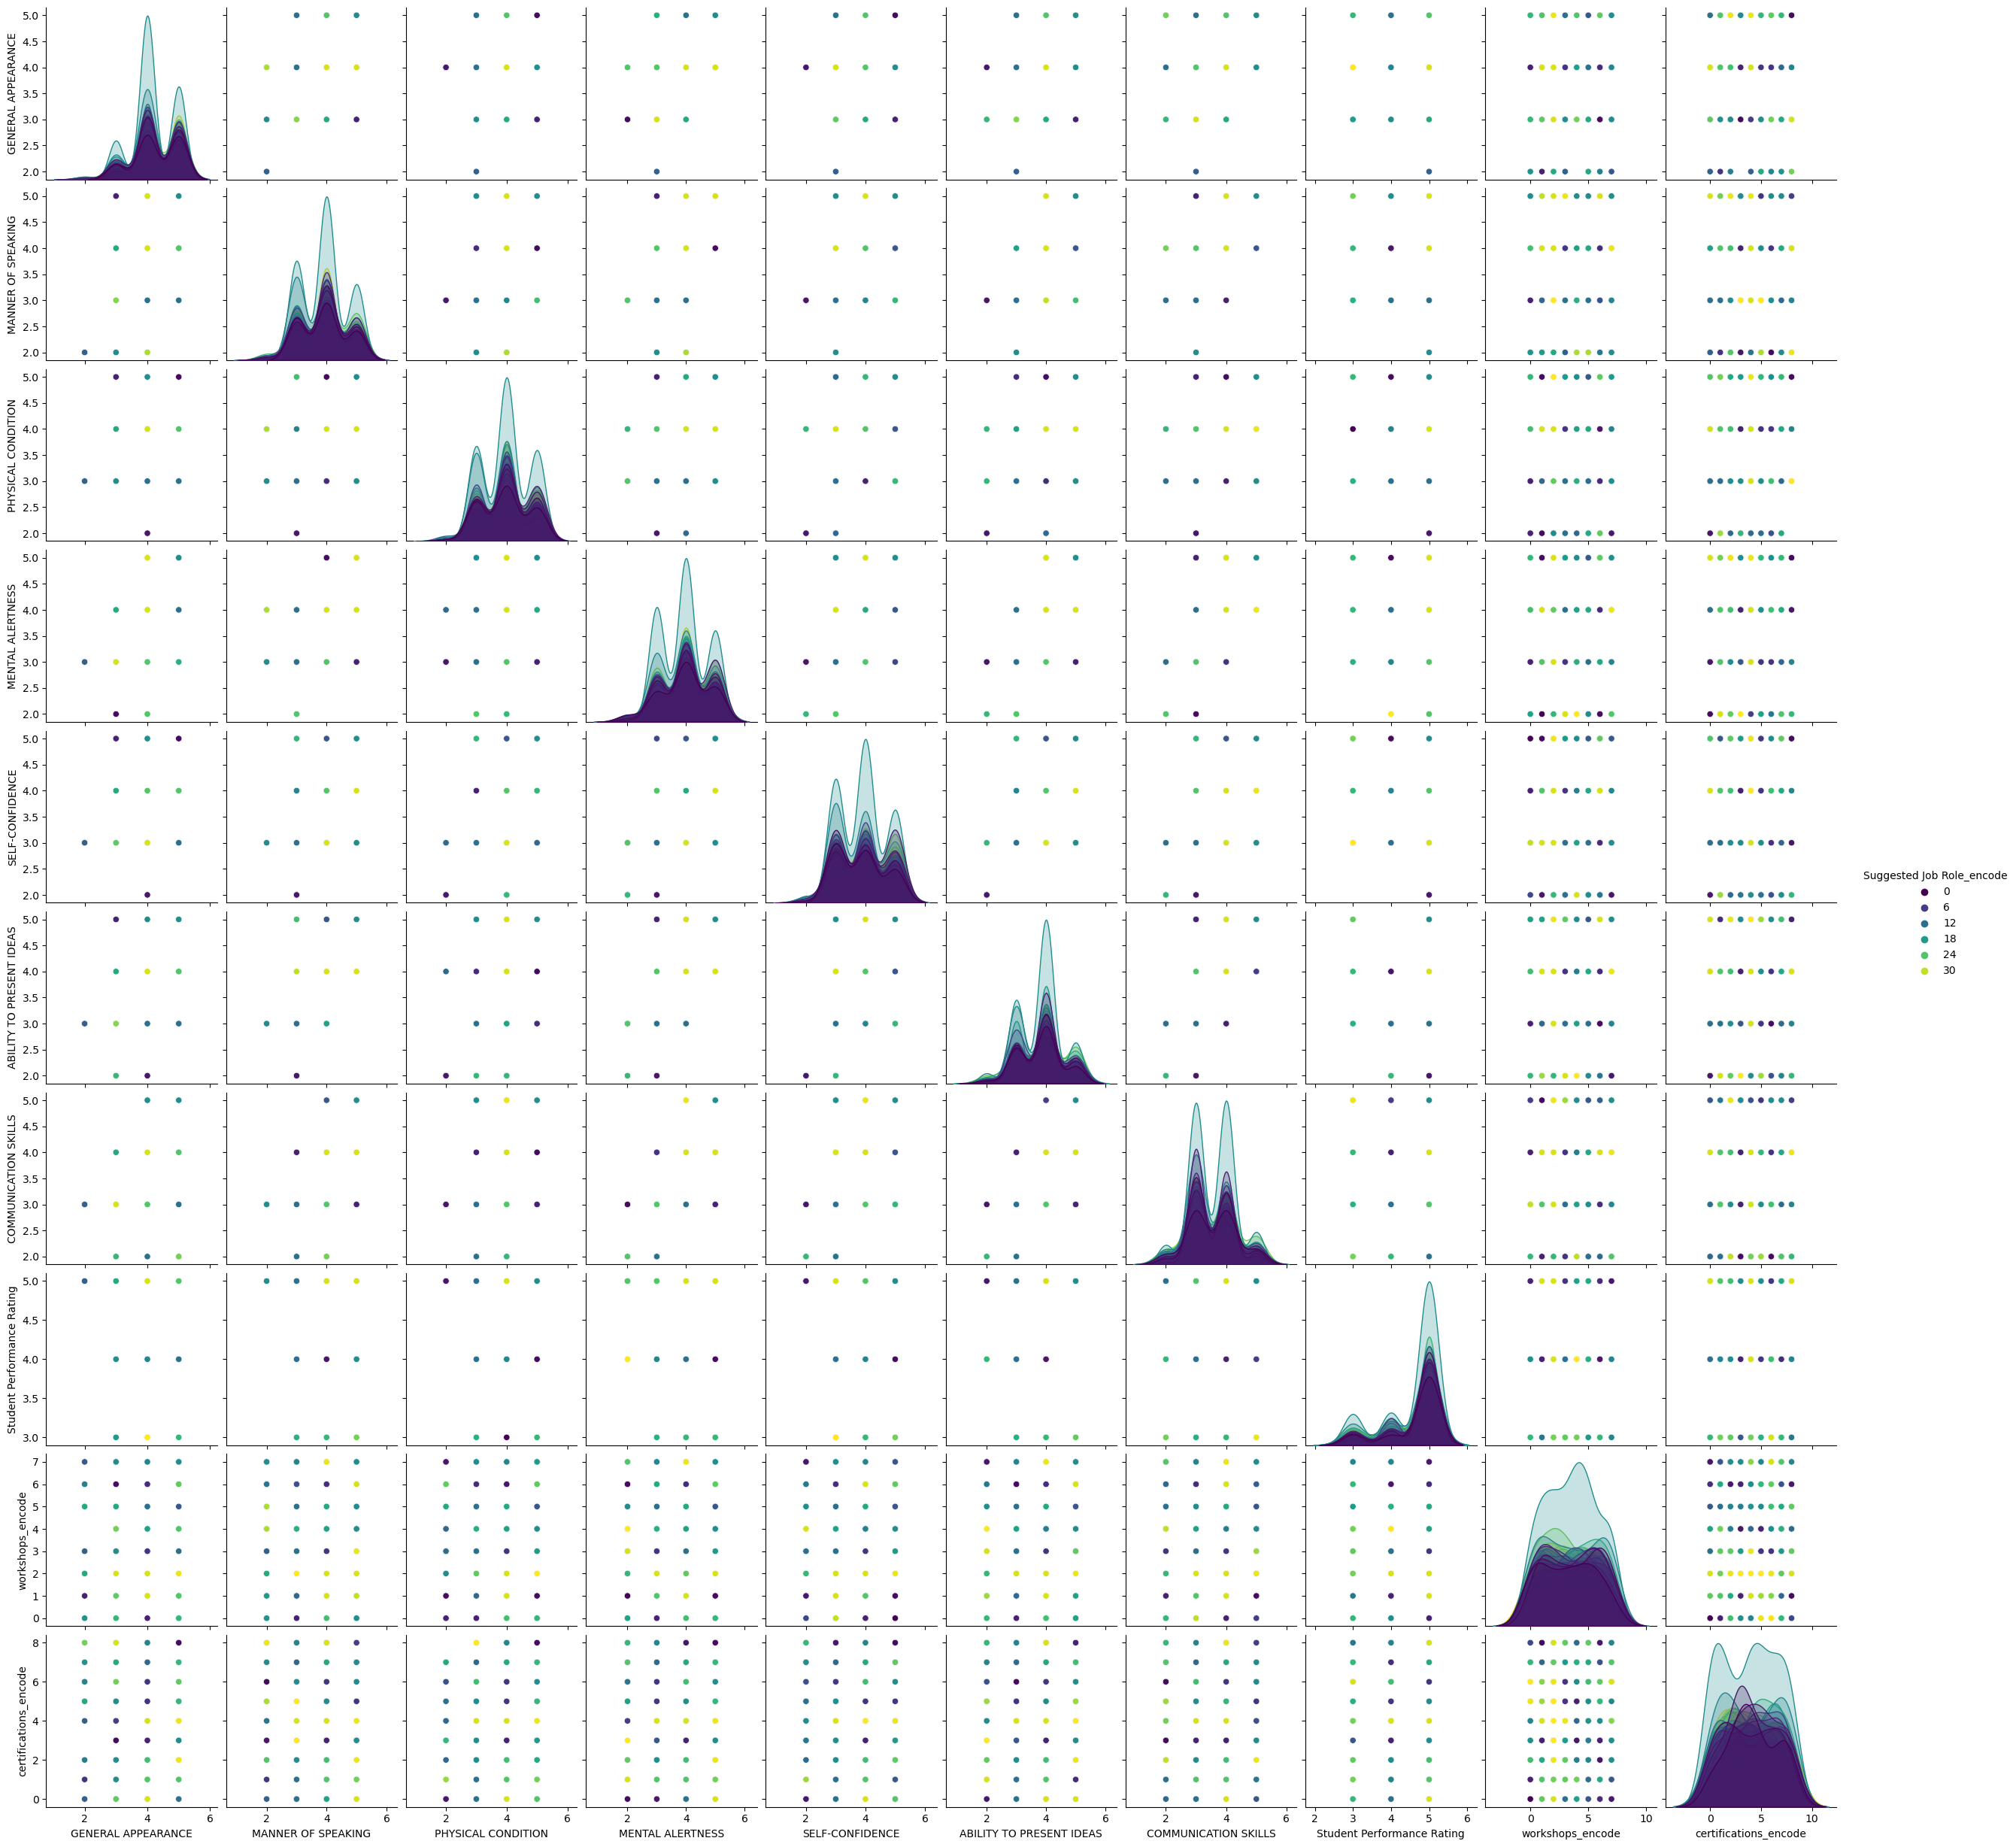

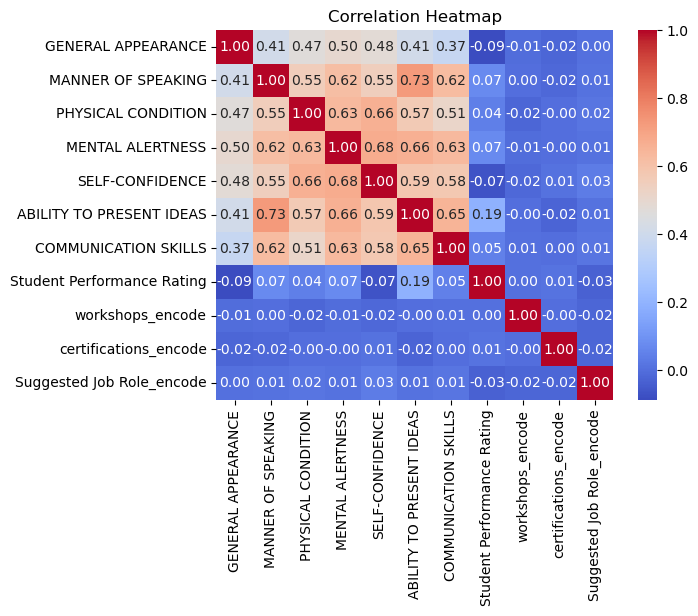

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plot
sns.pairplot(data, hue='Suggested Job Role_encode', palette='viridis')
plt.show()

# Create correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
tree_model = DecisionTreeClassifier()

In [88]:

tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [89]:
y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.8442211055276382
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.82      0.93      0.87       346
LessEmployable       0.89      0.72      0.80       251

      accuracy                           0.84       597
     macro avg       0.85      0.83      0.83       597
  weighted avg       0.85      0.84      0.84       597



In [90]:
import numpy as np
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'], line_color='darkslategray',
                                           fill_color='whitesmoke', align=['center','center'], font=dict(color='black', size=14), height=7), cells=dict(values=[['<b>DecisionTreeClassifier<b>'], [np.round(tree_model.score(X_train,y_train).mean(),4), ]])) ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
svm_model = SVC(kernel='linear', random_state=42)

In [53]:

svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [54]:

y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.5561139028475712
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.56      1.00      0.71       332
LessEmployable       0.00      0.00      0.00       265

      accuracy                           0.56       597
     macro avg       0.28      0.50      0.36       597
  weighted avg       0.31      0.56      0.40       597



In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)


LogisticRegression()

In [59]:
y_pred = logistic_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.5946398659966499
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.60      0.78      0.68       332
LessEmployable       0.57      0.36      0.44       265

      accuracy                           0.59       597
     macro avg       0.59      0.57      0.56       597
  weighted avg       0.59      0.59      0.57       597



In [85]:
import numpy as np
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'], line_color='darkslategray',
                                           fill_color='whitesmoke', align=['center','center'], font=dict(color='black', size=14), height=7), cells=dict(values=[['<b>Logistic Regression<b>'], [np.round(logistic_model.score(X_train,y_train).mean(),4), ]])) ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
model = RandomForestClassifier()


In [63]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
predictions = model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8425460636515912
Classification Report:
                 precision    recall  f1-score   support

    Employable       0.83      0.92      0.87       346
LessEmployable       0.87      0.74      0.80       251

      accuracy                           0.84       597
     macro avg       0.85      0.83      0.83       597
  weighted avg       0.85      0.84      0.84       597



In [82]:
import numpy as np
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'], line_color='darkslategray',
                                           fill_color='whitesmoke', align=['center','center'], font=dict(color='black', size=14), height=7), cells=dict(values=[['<b>Random Forest<b>'], [np.round(model.score(X_train,y_train).mean(),4), ]])) ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()